This notebook Tests Regression to predict tree growth (diameter/height) after fire

In [1]:
import pandas as pd
import numpy as np

from data_loader import data_load_and_split

big_firstMeas_train, big_secondMeas_train, big_firstMeas_test, big_secondMeas_test, trimmed_firstMeas_train, trimmed_secondMeas_train, trimmed_firstMeas_test, trimmed_secondMeas_test = data_load_and_split()


/Users/allierose/Library/CloudStorage/OneDrive-DukeUniversity/erdos/Erdos_Trees/machine_learning/data_loader.py:5: DtypeWarning: Columns (86,168,207,211,215) have mixed types. Specify dtype option on import or set low_memory=False.
  def data_load_and_split(big_data=pd.read_csv('../Data/final_big_data.csv'),
/Users/allierose/Library/CloudStorage/OneDrive-DukeUniversity/erdos/Erdos_Trees/machine_learning/data_loader.py:6: DtypeWarning: Columns (55,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  trimmed_data= pd.read_csv('../Data/trimmed_data.csv'),


In [2]:
from data_loader import data_merge

combined_train =data_merge(trimmed_firstMeas_train, trimmed_secondMeas_train)
combined_train.info()

SPCD inconsistent; column will not be merged.
SPGRPCD inconsistent; column will not be merged.
<class 'pandas.core.frame.DataFrame'>
Index: 7443 entries, 0 to 9724
Columns: 102 entries, PLOT to ALIVE_post_burn
dtypes: float64(66), int64(28), object(8)
memory usage: 5.8+ MB


**Look at features pre and post fire**

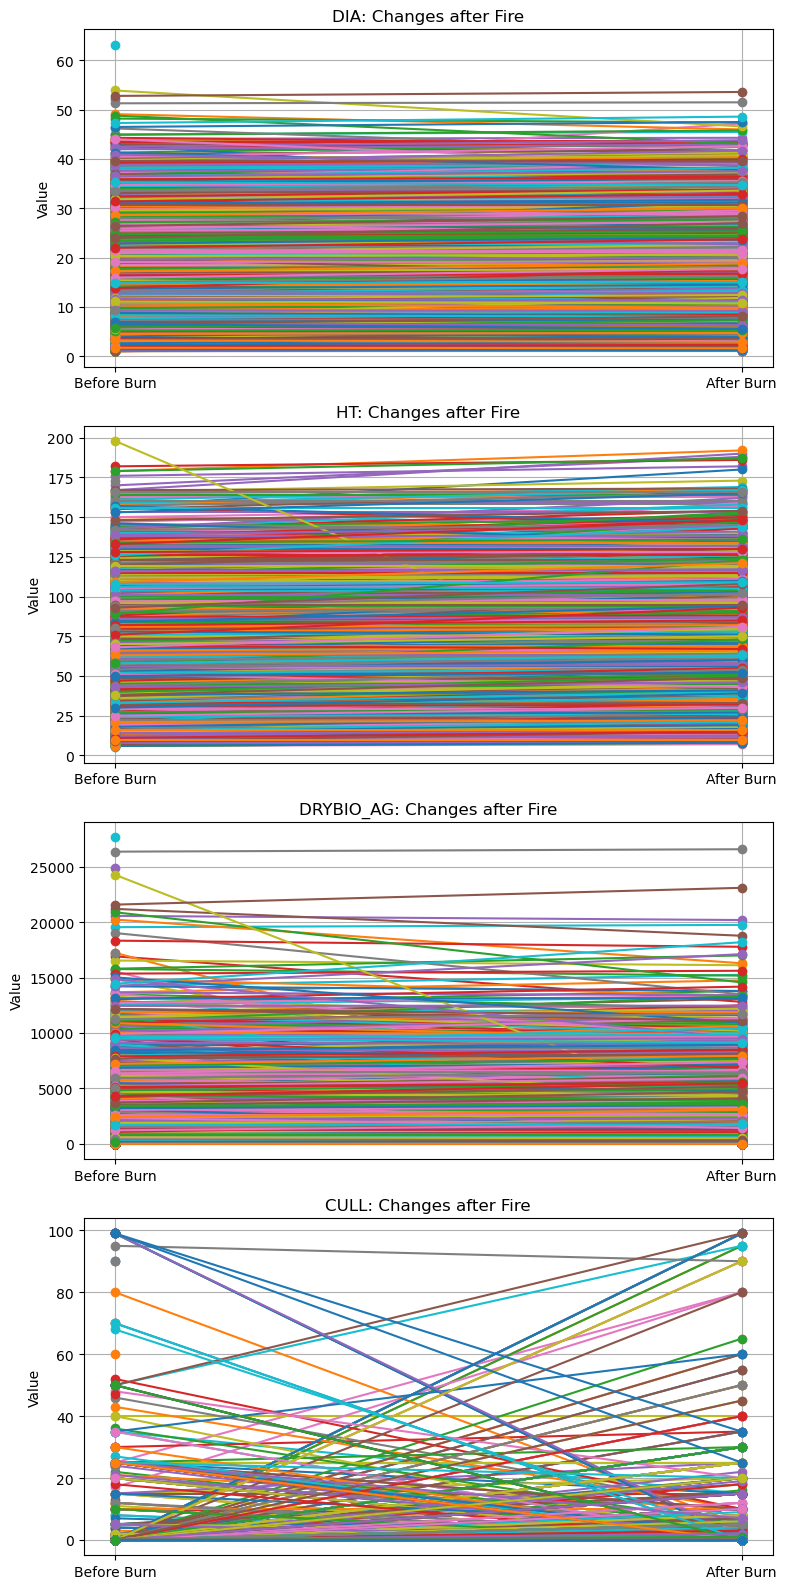

In [7]:
import matplotlib.pyplot as plt
features=["DIA","HT","DRYBIO_AG","CULL"]
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, len(features) * 4))
for i, feature in enumerate(features):
    beforeburn = combined_train[f'{feature}_pre_burn']
    afterburn = combined_train[f'{feature}_post_burn']
    for j in range(len(beforeburn)):
        axes[i].plot([1, 2], [beforeburn.iloc[j], afterburn.iloc[j]], marker='o', label=f'Point {j+1}' if i == 0 else "")
    
        axes[i].set_xticks([1, 2])
        axes[i].set_xticklabels(['Before Burn', 'After Burn'])
        axes[i].set_title(f'{feature}: Changes after Fire')
        axes[i].set_ylabel('Value')
        axes[i].grid(True)

fig.tight_layout()
plt.show()



It looks like Cull is the predictor that is changing the most. Let's try to predict it. This might be hard because as noted in Christina's notebook, most of the Cull values are zero pre and post fire. Still let's try it.